In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential


In [2]:
# Define hyperparameters
batch_size = 16
epochs = 50
learning_rate = 0.0001


In [3]:
# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/citrus-leaves-prepared/citrus_leaves_prepared/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/citrus-leaves-prepared/citrus_leaves_prepared/validation',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')


Found 475 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


In [5]:
# Define the model architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50


2023-04-30 03:32:53.136826: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


29/29 [==============================] - 17s 320ms/step - loss: 4.3206 - accuracy: 0.3137 - val_loss: 1.3100 - val_accuracy: 0.2857
Epoch 2/50
29/29 [==============================] - 7s 235ms/step - loss: 1.1156 - accuracy: 0.4946 - val_loss: 1.2423 - val_accuracy: 0.2857
Epoch 3/50
29/29 [==============================] - 7s 231ms/step - loss: 1.1249 - accuracy: 0.4314 - val_loss: 1.1862 - val_accuracy: 0.3036
Epoch 4/50
29/29 [==============================] - 7s 229ms/step - loss: 0.9497 - accuracy: 0.5381 - val_loss: 1.1208 - val_accuracy: 0.3839
Epoch 5/50
29/29 [==============================] - 7s 233ms/step - loss: 0.9666 - accuracy: 0.4902 - val_loss: 1.1124 - val_accuracy: 0.3839
Epoch 6/50
29/29 [==============================] - 7s 250ms/step - loss: 1.0512 - accuracy: 0.4793 - val_loss: 1.1221 - val_accuracy: 0.4554
Epoch 7/50
29/29 [==============================] - 7s 239ms/step - loss: 0.8873 - accuracy: 0.5948 - val_loss: 1.0706 - val_accuracy: 0.4732
Epoch 8/50
29/29

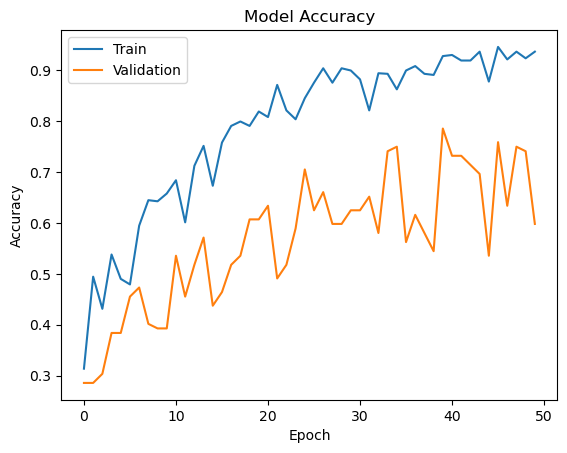

In [7]:
# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
pip install visualkeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 29.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


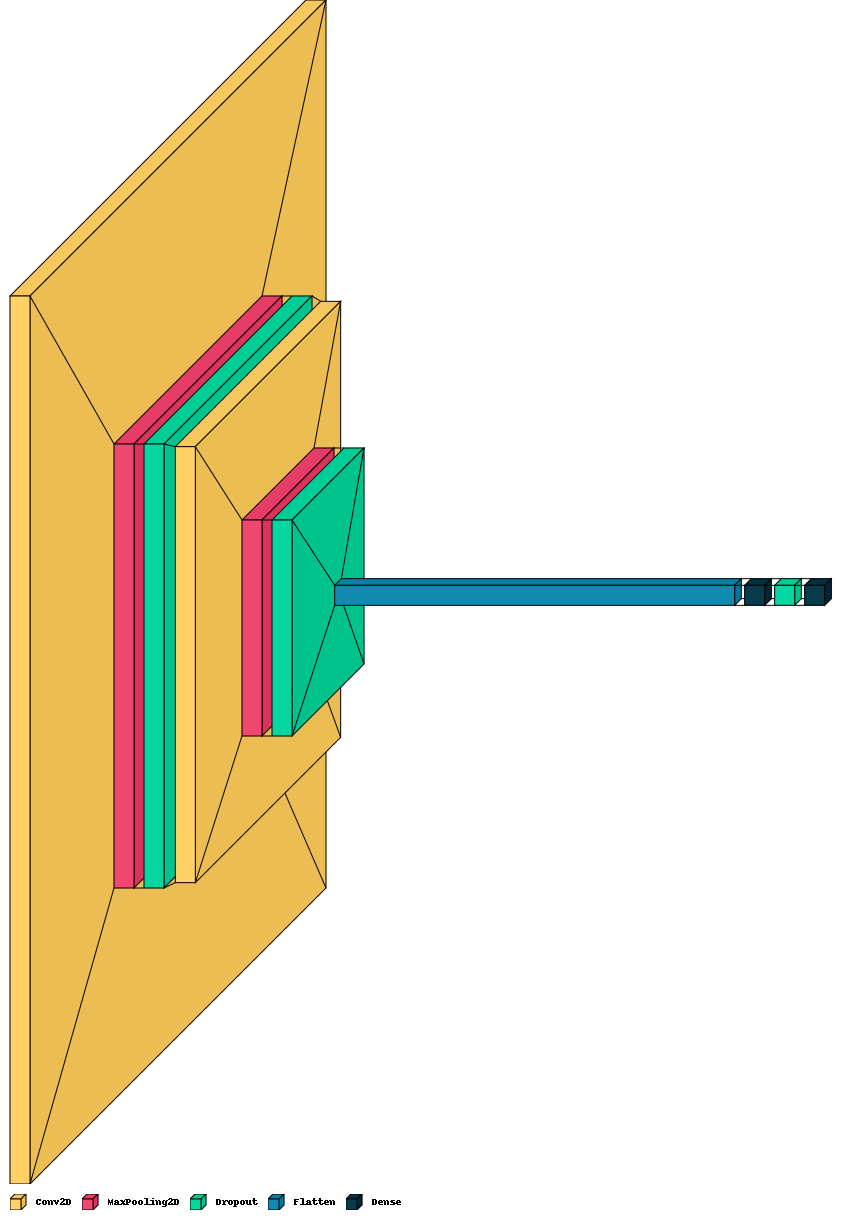

In [9]:
import visualkeras

from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [10]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
train_dir="/kaggle/input/citrus-leaves-prepared/citrus_leaves_prepared/train"
test_dir="/kaggle/input/citrus-leaves-prepared/citrus_leaves_prepared/validation"


# set up data generators
#train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
#test_datagen = ImageDataGenerator(rescale=1./255)
#train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=128, class_mode='categorical')
#test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=128, class_mode='categorical')


# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/citrus-leaves-prepared/citrus_leaves_prepared/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        '/kaggle/input/citrus-leaves-prepared/citrus_leaves_prepared/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# train the model
#history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)


Found 475 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


In [11]:
INIT_LR = 0.001
EPOCHS = 30
from keras.models import Model
from keras import applications
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from tensorflow.keras.applications.resnet50 import ResNet50

# Get the Resnet model so we can do transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all the layers except the last 2 dense layers
for layer in base_model.layers:
    layer.trainable = False
model.layers[-1].trainable = True
model.layers[-2].trainable = True
    
# Compile 
# Compile model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 4s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10)
best_model = ModelCheckpoint('best_model.h5', save_best_only=True)



In [13]:
# Train model
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.n // train_generator.batch_size,
        epochs=50,
        validation_data=val_generator,
        validation_steps=val_generator.n // val_generator.batch_size,
        callbacks=[early_stop, best_model])


Epoch 1/50
14/14 [==============================] - 8s 333ms/step - loss: 1.6653 - accuracy: 0.2799 - val_loss: 1.3609 - val_accuracy: 0.3333
Epoch 2/50
14/14 [==============================] - 3s 193ms/step - loss: 1.4137 - accuracy: 0.3431 - val_loss: 1.3636 - val_accuracy: 0.2500
Epoch 3/50
14/14 [==============================] - 4s 260ms/step - loss: 1.3452 - accuracy: 0.3612 - val_loss: 1.3249 - val_accuracy: 0.3438
Epoch 4/50
14/14 [==============================] - 4s 292ms/step - loss: 1.3033 - accuracy: 0.3950 - val_loss: 1.3493 - val_accuracy: 0.2396
Epoch 5/50
14/14 [==============================] - 4s 278ms/step - loss: 1.2947 - accuracy: 0.3612 - val_loss: 1.3092 - val_accuracy: 0.3229
Epoch 6/50
14/14 [==============================] - 3s 190ms/step - loss: 1.2681 - accuracy: 0.3837 - val_loss: 1.5146 - val_accuracy: 0.2812
Epoch 7/50
14/14 [==============================] - 3s 198ms/step - loss: 1.3835 - accuracy: 0.3634 - val_loss: 1.3155 - val_accuracy: 0.3958
Epoch 

In [14]:
# Evaluate model
test_loss, test_acc =model.evaluate(val_generator)
print("Test accuracy:", test_acc)

4/4 [==============================] - 2s 361ms/step - loss: 1.3173 - accuracy: 0.3471
Test accuracy: 0.3471074402332306


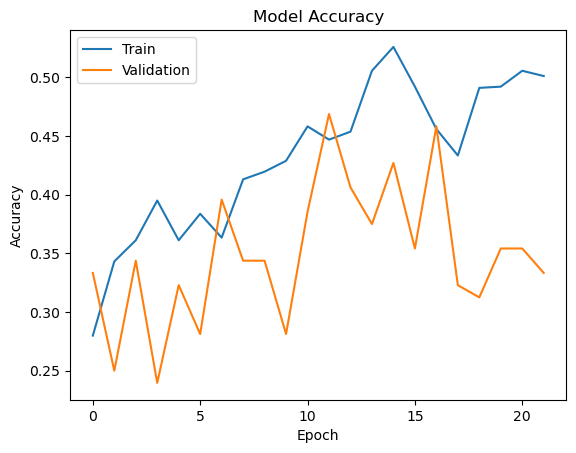

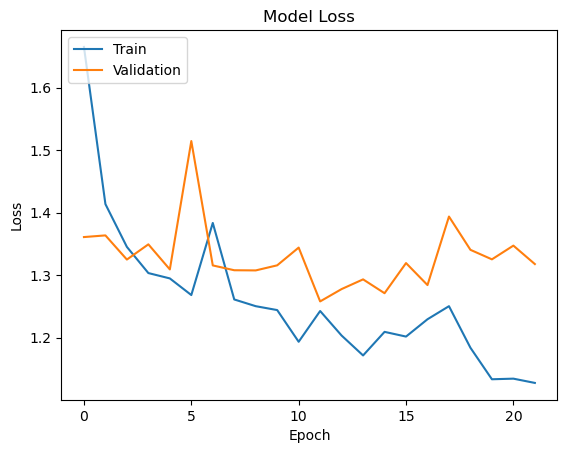

In [15]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
